# Lab 5

This lab references "Computational design and experimental validation of oligonucleotide-sensing allosteric ribozymes" by Robert Penchovsky and Ronald R Breaker.

Below is practice using the subprocess package with the muscle function.


In [23]:
import subprocess

seqs = """>seq1 
acatctag
>seq2
actctag"""

p = subprocess.run(['muscle', '-diags'],
                  input = bytes(seqs, 'ascii'), 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(p.stderr.decode())

print("*** And this would have been in your output file ***")
print(p.stdout.decode())

*** This is what you'd see on your terminal ***

MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 2 seqs, max length 8, avg  length 7





*** And this would have been in your output file ***
>seq1 
ACATCTAG
>seq2
AC-TCTAG



**Questions regarding the paper ribozymes:**
Will the AND-1 riboswitch cleave itself when both of its OBS are bound?
Yes
Will the OR-1 riboswitch cleave itself when neither of its OBS are bound?
No
What behavior do we expect from the YES-1 riboswitch?
If the OBS is bound, we can expect it to cleave itself.  Otherwise, it will not cleave itself.

**Grabbing the sequences from the paper:**
I could not find information on where the sequences were uploaded from the paper.  I had to copy down the sequences from the figures.

These sequences and annotations are in ribozymeseqs.txt.

Below, I create a table using sql and then add each ribozyme to it manually.  All of the position information is also in the text file above.


In [19]:
import sqlite3
conn = sqlite3.connect("New.db")
c = conn.cursor()

#creating ribozyme table with specified fields
c.execute("""CREATE TABLE ribozymes (id INT, 
                                name TEXT,
                                start_end_OBS1 TEXT,
                                start_end_OBS2 TEXT,
                                start_end_Red TEXT);""")
conn.commit()

In [20]:
import sqlite3
conn = sqlite3.connect("New.db")
c = conn.cursor()
#inserting individual information for each ribozyme
c.execute("""INSERT INTO ribozymes (id, 
                                name,
                                start_end_OBS1,
                                start_end_OBS2,
                                start_end_Red)
                                VALUES
                                ('1', 
                                'YES-1', 
                                '26-47',
                                'N/A', 
                                "16-21,49-54");""")
conn.commit()
c.execute("""INSERT INTO ribozymes (id, 
                                name,
                                start_end_OBS1,
                                start_end_OBS2,
                                start_end_Red)
                                VALUES
                                ('2', 
                                'NOT-1', 
                                '44-66',
                                'N/A', 
                                "40-43,74-77");""")
conn.commit()
c.execute("""INSERT INTO ribozymes (id, 
                                name,
                                start_end_OBS1,
                                start_end_OBS2,
                                start_end_Red)
                                VALUES
                                ('3', 
                                'AND-1', 
                                '30-45',
                                '49-64', 
                                "16-23,70-77");""")
conn.commit()
c.execute("""INSERT INTO ribozymes (id, 
                                name,
                                start_end_OBS1,
                                start_end_OBS2,
                                start_end_Red)
                                VALUES
                                ('4', 
                                'OR-1', 
                                '26-46',
                                '47-66', 
                                "16-26,67-77");""")
conn.commit()

**Check:** In order to ensure that my table information was added correctly, I used the SELECT method of sql to print each row.

In [21]:
import sqlite3
conn = sqlite3.connect("New.db")
c = conn.cursor()

c.execute("""SELECT * FROM ribozymes""")
for row in c:
    print(row)



(1, 'YES-1', '26-47', 'N/A', '16-21,49-54')
(2, 'NOT-1', '44-66', 'N/A', '40-43,74-77')
(3, 'AND-1', '30-45', '49-64', '16-23,70-77')
(4, 'OR-1', '26-46', '47-66', '16-26,67-77')


**Running RNAfold:**
I downloaded RNAfold package and placed the RNAfold.exe and RNAplot.exe in the same folder as my notebook.

I called RNAfold through the terminal by first changing directories to the correct one and running RNAfold.exe.  I used dummy sequences and was able to input the resulting structure into RNAplot.exe.
A .ps file was created in the folder carrying the strucuture information.

**Plotting Ribozymes using RNAfold:**
Below, I use the subprocess package to call RNAfold with the given ribozyme sequences.  Then, I used subprocess to call RNAplot inputting the results from RNAfold.  All sequences were run through this process, and a ps file was returned for each.  I converted these files to png files.

In [28]:
import subprocess

seqs = """>YES-1 
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>NOT-1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>AND-1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>OR-1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
"""

p = subprocess.run(['RNAfold'],
                  input = bytes(seqs, 'ascii'), 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(p.stderr.decode())

print("*** And this would have been in your output file ***")
print(p.stdout.decode())


###################################################################################################################
q = subprocess.run(['RNAplot'],
                  input = p.stdout, 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(q.stderr.decode())

print("*** And this would have been in your output file ***")
print(q.stdout.decode())


*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***
>YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
>NOT-1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
>AND-1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
>OR-1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)

*** This is what you'd see on your terminal ***

***

In [18]:
# import sqlite3
# conn = sqlite3.connect("New.db")
# c = conn.cursor()

# c.execute("""DROP TABLE ribozymes""")



YES-1


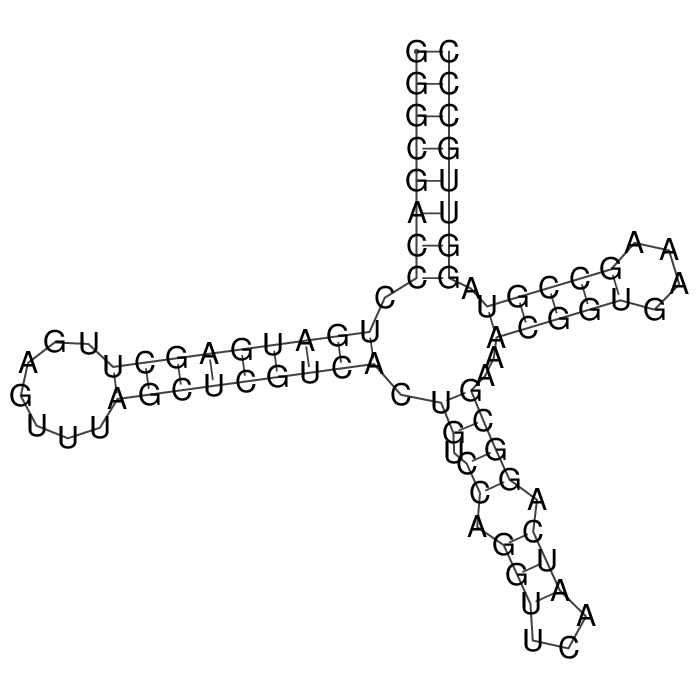

In [40]:
#Using Image package to display ribozyme plots
from IPython.display import Image
print("YES-1")
Image(filename= "YES-1_ss.png", width=400, height=400)


NOT-1


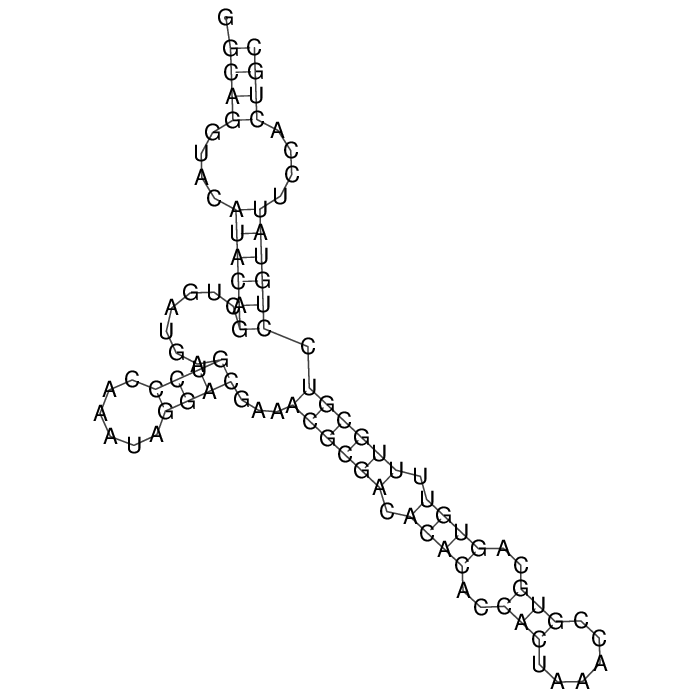

In [41]:
from IPython.display import Image
print("NOT-1")
Image(filename= "NOT-1_ss.png", width=400, height=400)


AND-1


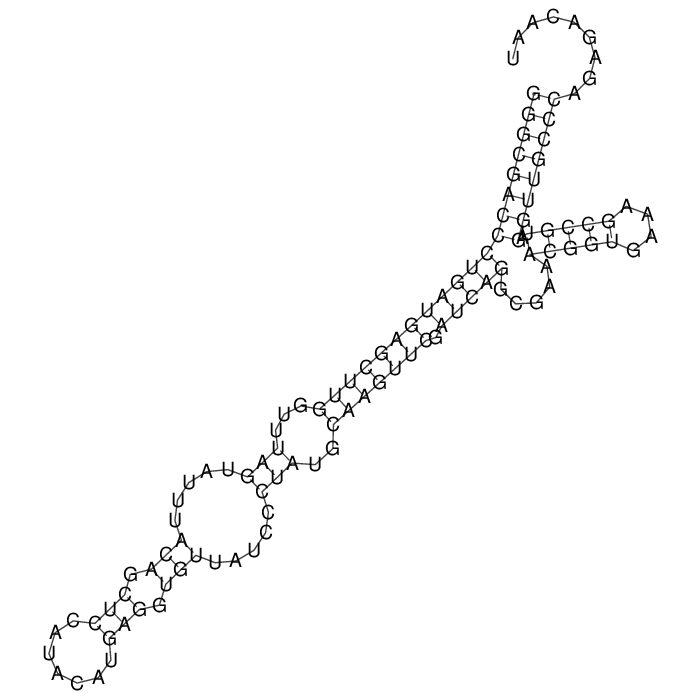

In [42]:
from IPython.display import Image
print("AND-1")
Image(filename= "AND-1_ss.png", width=400, height=400)


OR-1


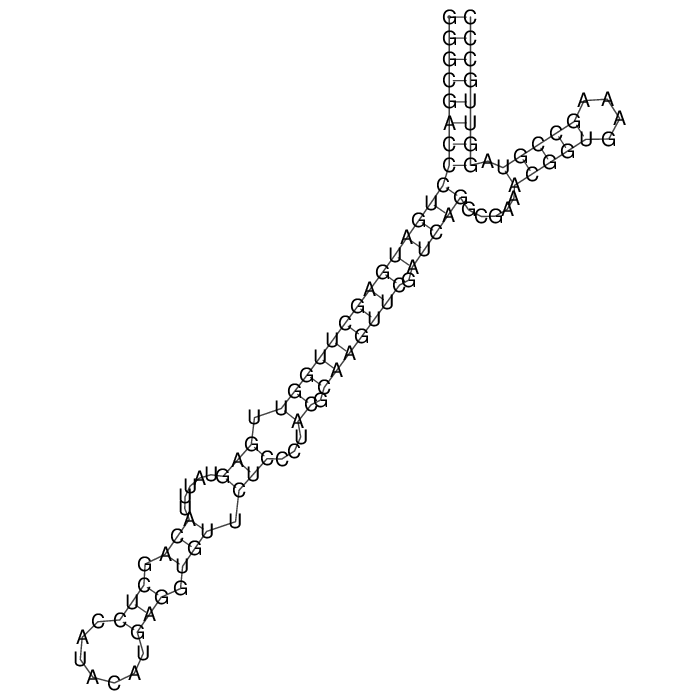

In [43]:
from IPython.display import Image
print("OR-1")
Image(filename= "OR-1_ss.png", width=400, height=400)

 **Observations:**
Yes-1: There are three stem loops instead of two in my produced conformation.  One of the stem loops are similar.
Not-1: This one looks very similar to the one shown in the paper.
And-1: This one looks very similar to the one shown in the paper.
Or-1:This one looks very similar to the one shown in the paper.


**Simulating OBS binding:**
Below I pass an argument that includes a textfile with the OBS positions replaced with x's.  Both RNAfold and RNAplot are used for both Yes-1 and Not-1.

When the OBS in Yes-1 is bound, the red regions of the structure overlap so the protein self-cleaves.
When the OBS in Yes-1 is bound, the red regions of the structure do not overlap so the protein does not self-cleave.



In [44]:
import subprocess

Yes1 = """>YES-1_True  
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
"""

p = subprocess.run(['RNAfold', '-C', 'YES-1_constraints.txt'],
                  input =bytes(Yes1, 'ascii'), 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(p.stderr.decode())

print("*** And this would have been in your output file ***")
print(p.stdout.decode())


###################################################################################################################
q = subprocess.run(['RNAplot'],
                  input = p.stdout, 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(q.stderr.decode())

print("*** And this would have been in your output file ***")
print(q.stdout.decode())

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***
>YES-1_constraints
GGGCGACCCUGAUGAGCUUGAGUUUxxxxxxxxxxxxxxxxxxxxxxAUCAGGC GAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))....(((((....))))).)))))))) (-24.10)

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***



YES-1_True


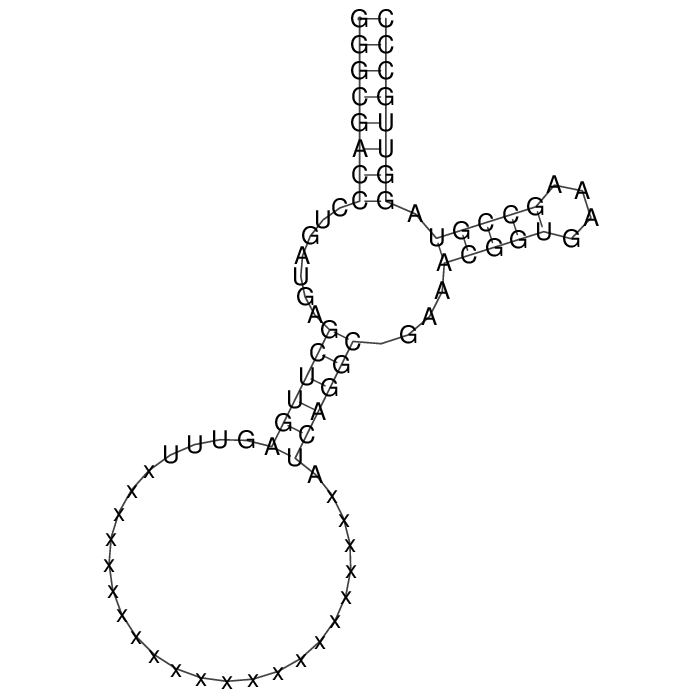

In [45]:
from IPython.display import Image
print("YES-1_True")
Image(filename= "YES-1_constraints_ss.png", width=400, height=400)

In [46]:
import subprocess

Not1 = """>NOT-1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
"""

p = subprocess.run(['RNAfold', '-C', 'NOT-1_constraints.txt'],
                  input =bytes(Not1, 'ascii'), 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(p.stderr.decode())

print("*** And this would have been in your output file ***")
print(p.stdout.decode())


###################################################################################################################
q = subprocess.run(['RNAplot'],
                  input = p.stdout, 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(q.stderr.decode())

print("*** And this would have been in your output file ***")
print(q.stdout.decode())

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***
>NOT-1_constraints
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCxxxxxxxxxxxxxxxxxxxxxxxGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((((.......................))))))).))))))))))....)))) (-19.30)

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***



Not-1 Constraints Image:
<img src="files/NOT-1_constraints_ss.png" width="400" height="400">


**OBS-binding in AND-1 and OR-1:**
For this portion of the lab, I made several constraint files to represent binding at one or both OBS in each sequence.  These conformations are labeled as boolean inputs: T/F, F/T, T/T.

In [4]:
import subprocess

And1 = """>AND-1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
"""


###T/F Constraints
###################################################################################################################
a = subprocess.run(['RNAfold', '-C', 'AND-1_TFconstraints.txt'],
                  input =bytes(And1, 'ascii'), 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(a.stderr.decode())

print("*** And this would have been in your output file ***")
print(a.stdout.decode())

b = subprocess.run(['RNAplot'],
                  input = a.stdout, 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(b.stderr.decode())

print("*** And this would have been in your output file ***")
print(b.stdout.decode())

####F/T Constraints
###################################################################################################################
c = subprocess.run(['RNAfold', '-C', 'AND-1_FTconstraints.txt'],
                  input =bytes(And1, 'ascii'), 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(c.stderr.decode())

print("*** And this would have been in your output file ***")
print(c.stdout.decode())

d = subprocess.run(['RNAplot'],
                  input = c.stdout, 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(d.stderr.decode())

print("*** And this would have been in your output file ***")
print(d.stdout.decode())

###T/T Constraints
###################################################################################################################
e = subprocess.run(['RNAfold', '-C', 'AND-1_TTconstraints.txt'],
                  input =bytes(And1, 'ascii'), 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(e.stderr.decode())

print("*** And this would have been in your output file ***")
print(e.stdout.decode())

f = subprocess.run(['RNAplot'],
                  input = e.stdout, 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(f.stderr.decode())

print("*** And this would have been in your output file ***")
print(f.stdout.decode())

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***
>AND-1_TFconstraints
GGGCGACCCUGAUGAGCUUGGUUUAGUAUxxxxxxxxxxxxxxxxGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***
>AND-1_FTconstaints
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGxxxxxxxxxxxxxxxxAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((((((...(((.......))))))........................))))).))))).....(((((....))))).))))))))......... (-29.60)

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***

*** This is what you'd see on your terminal ***

*** And this would have been

And-1 T/F Constraints Image:
<img src="files/AND-1_TFconstraints_ss.png" width="400" height="400">

And-1 F/T Constraints Image:
<img src="files/AND-1_FTconstaints_ss.png" width="400" height="400">

And-1 T/T Constraints Image:
<img src="files/AND-1_TTconstraints_ss.png" width="400" height="400">

In [6]:
import subprocess

Or1 = """>OR-1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
"""

###T/F Constraints
###################################################################################################################
a = subprocess.run(['RNAfold', '-C', 'OR-1_TFconstraints.txt'],
                  input =bytes(Or1, 'ascii'), 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(a.stderr.decode())

print("*** And this would have been in your output file ***")
print(a.stdout.decode())

b = subprocess.run(['RNAplot'],
                  input = a.stdout, 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(b.stderr.decode())

print("*** And this would have been in your output file ***")
print(b.stdout.decode())

####F/T Constraints
###################################################################################################################
c = subprocess.run(['RNAfold', '-C', 'OR-1_FTconstraints.txt'],
                  input =bytes(Or1, 'ascii'), 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(c.stderr.decode())

print("*** And this would have been in your output file ***")
print(c.stdout.decode())

d = subprocess.run(['RNAplot'],
                  input = c.stdout, 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(d.stderr.decode())

print("*** And this would have been in your output file ***")
print(d.stdout.decode())

###T/T Constraints
###################################################################################################################
e = subprocess.run(['RNAfold', '-C', 'OR-1_TTconstraints.txt'],
                  input =bytes(Or1, 'ascii'), 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(e.stderr.decode())

print("*** And this would have been in your output file ***")
print(e.stdout.decode())

f = subprocess.run(['RNAplot'],
                  input = e.stdout, 
                  stdout=subprocess.PIPE,
                   stderr=subprocess.PIPE)

print("*** This is what you'd see on your terminal ***")
print(f.stderr.decode())

print("*** And this would have been in your output file ***")
print(f.stdout.decode())

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***
>OR-1_TFconstraints
GGGCGACCCUGAUGAGCUUGGUUGAGxxxxxxxxxxxxxxxxxxxxAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((...........................)))...)).))))))).))))).....(((((....))))).)))))))) (-33.10)

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***
>OR-1_FTconstaints
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGxxxxxxxxxxxxxxxxxxxxUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......(((((((((((........................................)))))))))))...(((((....))))).)))))))) (-29.09)

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***

*** This is what you'd see on your terminal ***

*** And this would have been in your output file ***
>OR-1_TTconst

OR-1 T/F Constraints Image:
<img src="files/OR-1_TFconstraints_ss.png" width="400" height="400">

OR-1 F/T Constraints Image:
<img src="files/OR-1_FTconstaints_ss.png" width="400" height="400">

OR-1 T/T Constraints Image:
<img src="files/OR-1_TTconstraints_ss.png" width="400" height="400">

**Observations:**
*AND-1*
T/F:The red regions do not fully overlap and the conformation looks different than the paper.
F/T:The red regions do not overlap in this conformation and the conformation looks similar to the paper.
T/T:The red regions do not overlap in this conformation, differing from the paper.

*OR-1*
T/F:The red regions do not fully overlap and the conformation looks slightly different than the paper.
F/T:The red regions fully overlap and the conformation is the same as the one shown in the paper.
T/T:The red regions fully overlap and the conformation is the same as the one shown in the paper.

Below are the truth tables describing each set of conformations for the AND-1 and OR-1 sequence.

In [7]:
import sqlite3
conn = sqlite3.connect("New.db")
c = conn.cursor()

#creating ribozyme table with specified fields
c.execute("""CREATE TABLE And1 (input TEXT,
                                output TEXT);""")

c.execute("""CREATE TABLE Or1 (input TEXT,
                                output TEXT);""")

conn.commit()

#inserting individual information for each ribozyme
c.execute("""INSERT INTO And1 (input,
                                output)
                                VALUES
                                ('F/F', 
                                'F');""")
c.execute("""INSERT INTO And1 (input,
                                output)
                                VALUES
                                ('T/F', 
                                'F');""")
c.execute("""INSERT INTO And1 (input,
                                output)
                                VALUES
                                ('F/T', 
                                'F');""")
c.execute("""INSERT INTO And1 (input,
                                output)
                                VALUES
                                ('T/T', 
                                'F');""")
conn.commit()

c.execute("""INSERT INTO Or1 (input,
                                output)
                                VALUES
                                ('F/F', 
                                'F');""")
c.execute("""INSERT INTO Or1 (input,
                                output)
                                VALUES
                                ('T/F', 
                                'F');""")
c.execute("""INSERT INTO Or1 (input,
                                output)
                                VALUES
                                ('F/T', 
                                'T');""")
c.execute("""INSERT INTO Or1 (input,
                                output)
                                VALUES
                                ('T/T', 
                                'T');""")
conn.commit()








In [8]:
import sqlite3
conn = sqlite3.connect("New.db")
c = conn.cursor()

c.execute("""SELECT * FROM And1""")
for row in c:
    print(row)
    
c.execute("""SELECT * FROM Or1""")
for row in c:
    print(row)

('F/F', 'F')
('T/F', 'F')
('F/T', 'F')
('T/T', 'F')
('F/F', 'F')
('T/F', 'F')
('F/T', 'T')
('T/T', 'T')
